# Suport Vector Machine (SVM)

O objetivo de um SVM é encontrar o hiperplano de separação ideal o qual maximiza a margem da base de treinamento.

A primeira coisa que notamos nesta definição, é que o SVM precisa de uma base de treinamento. O que quer dizer que é um algoritmo de aprendizado supervisionado.

Também é importante saber que o SVM é um algoritmo de classificação. Isso quer dizer que iremos usá-lo para predizer se algo pertence a uma classe particular.

Para uma explicação mais intuitiva e visual assista [How Support Vector Machines work / How to open a black box](https://www.youtube.com/watch?v=-Z4aojJ-pdg)

### Gerando dados artificiais

Vamos criar uma matriz com duas colunas e vinte linhas.

In [3]:
set.seed(1)

x = matrix(rnorm(20*2), ncol = 2)
x

-0.62645381,0.91897737
0.18364332,0.78213630
-0.83562861,0.07456498
1.59528080,-1.98935170
0.32950777,0.61982575
-0.82046838,-0.05612874
0.48742905,-0.15579551
0.73832471,-1.47075238
0.57578135,-0.47815006
-0.30538839,0.41794156
1.51178117,1.35867955


In [4]:
# gerando a variável resposta
y = c(rep(-1, 10), rep(1,10))
y

[1] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1

Agora vamos adicionar mais 1 nos últimos 10 valores da nossa matriz x

In [5]:
x[y==1,] = x[y==1,] + 1
x

-0.6264538,0.91897737
0.1836433,0.78213630
-0.8356286,0.07456498
1.5952808,-1.98935170
0.3295078,0.61982575
-0.8204684,-0.05612874
0.4874291,-0.15579551
0.7383247,-1.47075238
0.5757814,-0.47815006
-0.3053884,0.41794156
2.5117812,2.35867955


Vamos ver se esse nosso dataset artificial é linearmente separável

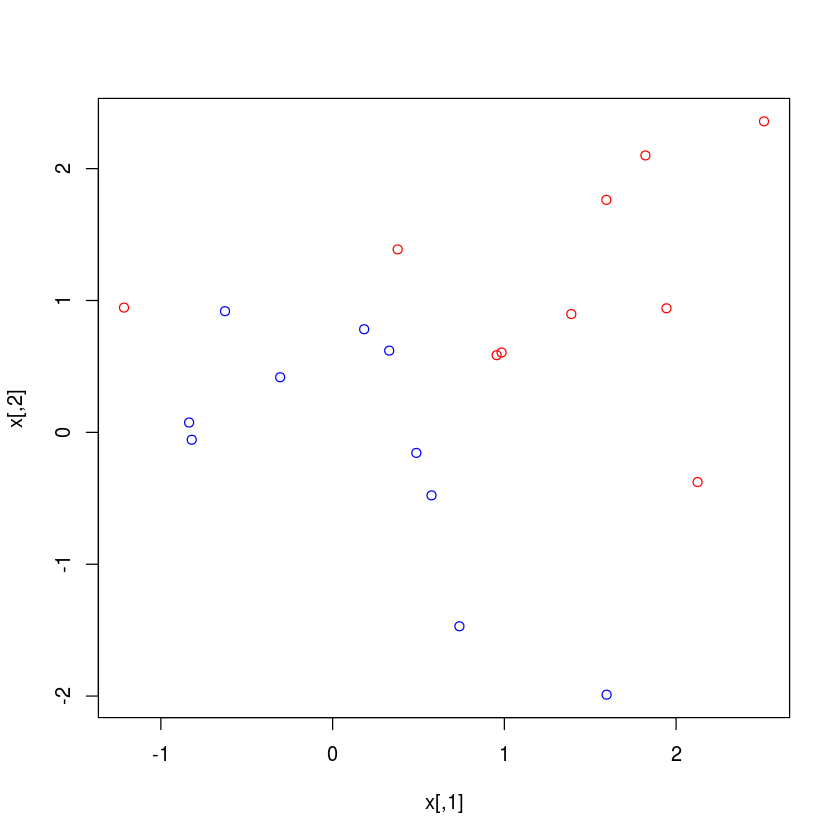

In [6]:
plot(x, col=c(3-y)) # col = 2 então azul, col = 4 etão vermelho

Vamos agora criar nosso dataframe dat com os dados de x e y

In [9]:
dat = data.frame(x, y=as.factor(x = y))
dat

X1,X2,y
-0.6264538,0.91897737,-1
0.1836433,0.78213630,-1
-0.8356286,0.07456498,-1
1.5952808,-1.98935170,-1
0.3295078,0.61982575,-1
-0.8204684,-0.05612874,-1
0.4874291,-0.15579551,-1
0.7383247,-1.47075238,-1
0.5757814,-0.47815006,-1
-0.3053884,0.41794156,-1


### Brincando com SVM

O nome do pacote que iremos usar no R é *e1071*, que é a sala na Universidade de Berlim onde esse pacote foi apresentado pela primeira vez. 

In [11]:
library(e1071)

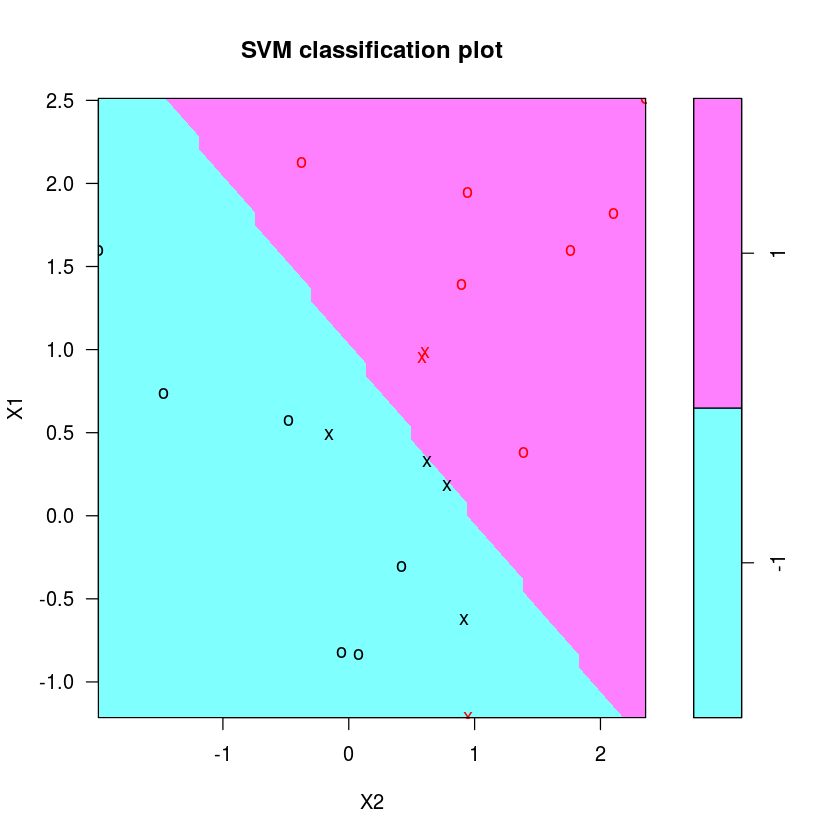

In [12]:
# gerando nosso modelo
svmfit = svm(y ~., data = dat, kernel = "linear", cost = 10, scale = FALSE)
plot(svmfit, dat)

In [14]:
# os índices de nossos vetores suporte
svmfit$index

[1]  1  2  5  7 14 16 17

Isso quer dizer que nossa 1ª, 2ª, 5ª, 7ª, 14ª, 16ª e 17ª observações são nossos vetores suportes. 

In [15]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




Temos 7 vetores suporte, 4 na categoria -1 e 3 na categoria 1. 

Usamos como custo o valor 10, para achar o valor de custo ideal precisamos usar uma técnica de cross-validation. Para isso podemos usar o tune(afinação) do modelo.

In [18]:
set.seed(1)
tune.out = tune(svm, y~., data=dat, kernel = 'linear', 
                ranges = list( cost = c(.001, 0.01, 0.1, 1, 5, 10, 100)))

In [19]:
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.70  0.4216370
2 1e-02  0.70  0.4216370
3 1e-01  0.10  0.2108185
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229


O melhor custo usando foi o 0.1!

In [20]:
tune.out$best.model


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16


In [21]:
summary(tune.out$best.model)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1


